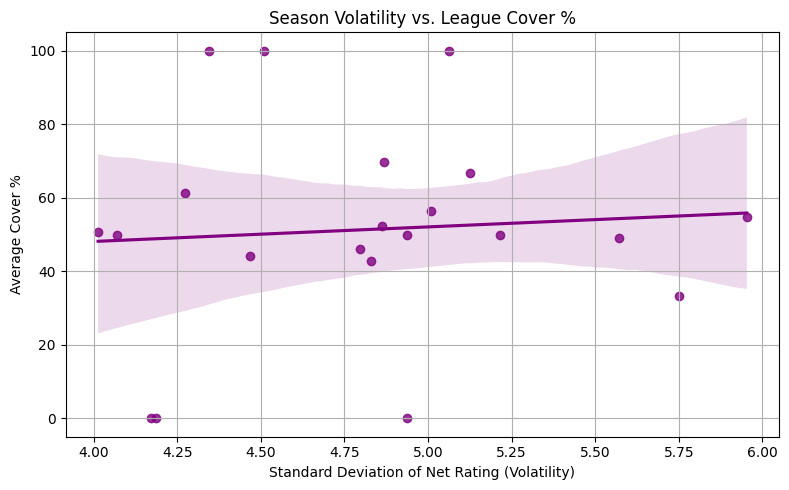

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Placeholder file paths ---
team_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'
spread_data_path = '/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv'

# === Load team advanced stats ===
team_df = pd.read_csv(team_stats_path)
team_df['Year'] = team_df['Year'].astype(int)

# Remove 2020 if needed
team_df = team_df[team_df['Year'] != 2020]

# === Calculate yearly NetRtg standard deviation (volatility) ===
volatility = team_df.groupby('Year')['NetRtg'].std().reset_index()
volatility.columns = ['Year', 'NetRtg_Std']

# === Load spread data and assign years ===
spread_df = pd.read_csv(spread_data_path)
spread_df['Cover_PCT'] = spread_df['Cover_PCT'].astype(float)
spread_df['Year'] = list(range(2003, 2003 + len(spread_df)))  # adjust start year if needed
spread_df = spread_df[spread_df['Year'] != 2020]

# === Merge data ===
merged = pd.merge(volatility, spread_df[['Year', 'Cover_PCT']], on='Year')

# === Plot ===
plt.figure(figsize=(8, 5))
sns.regplot(data=merged, x='NetRtg_Std', y='Cover_PCT', color='purple')
plt.title('Season Volatility vs. League Cover %')
plt.xlabel('Standard Deviation of Net Rating (Volatility)')
plt.ylabel('Average Cover %')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Print the merged data to see values per year
print("Volatility (NetRtg Std) vs. Cover % by Year:\n")
print(merged.sort_values('Year').to_string(index=False))

# Optional: print correlation between volatility and cover %
corr = merged['NetRtg_Std'].corr(merged['Cover_PCT'])
print(f"\nCorrelation between Net Rating Volatility and Cover %: {corr:.4f}")


Volatility (NetRtg Std) vs. Cover % by Year:

 Year  NetRtg_Std  Cover_PCT
 2003    4.510538      100.0
 2004    4.171472        0.0
 2005    4.345028      100.0
 2006    4.184861        0.0
 2007    4.070985       50.0
 2008    5.750646       33.3
 2009    5.061667      100.0
 2010    4.938287        0.0
 2011    4.936535       50.0
 2012    5.124206       66.7
 2013    4.868865       69.6
 2014    4.829113       42.9
 2015    5.009641       56.3
 2016    5.214300       50.0
 2017    4.272317       61.4
 2018    4.466040       44.2
 2019    4.795395       46.0
 2022    4.861796       52.4
 2023    4.013116       50.8
 2024    5.570023       49.1
 2025    5.953382       54.8

Correlation between Net Rating Volatility and Cover %: 0.0754
